In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataframe=pd.read_csv("/content/Stroke data.csv")
print("----------------------------------------------------")
print("Data Selection                 ")
print("----------------------------------------------------")
print()
print(dataframe.head(15))


----------------------------------------------------
Data Selection                 
----------------------------------------------------

       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0          

In [ ]:
print()
print("----------------------------------------------------")
print("Before Handling Missing values             ")
print("----------------------------------------------------")
print()
print(dataframe.isnull().sum())

print()
print("----------------------------------------------------")
print(" After Handling Missing Values             ")
print("----------------------------------------------------")
print()
dataframe=dataframe.fillna(0)
print(dataframe.isnull().sum())


----------------------------------------------------
Before Handling Missing values             
----------------------------------------------------

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

----------------------------------------------------
 After Handling Missing Values             
----------------------------------------------------

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
print()
print("----------------------------------------------------")
print("Before Label Encoding                 ")
print("----------------------------------------------------")
print()
print(dataframe['gender'].head(10))

print()
print("----------------------------------------------------")
print("After Label Encoding                  ")
print("----------------------------------------------------")
print()
label_encoder = preprocessing.LabelEncoder()
dataframe['gender']= label_encoder.fit_transform(dataframe['gender'])

print(dataframe['gender'].head(10))

Label=['ever_married','work_type','Residence_type','smoking_status']

dataframe[Label] = dataframe[Label].apply(label_encoder.fit_transform)


----------------------------------------------------
Before Label Encoding                 
----------------------------------------------------

0      Male
1    Female
2      Male
3    Female
4    Female
5      Male
6      Male
7    Female
8    Female
9    Female
Name: gender, dtype: object

----------------------------------------------------
After Label Encoding                  
----------------------------------------------------

0    1
1    0
2    1
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: gender, dtype: int64


In [ ]:
X=dataframe.drop(['stroke'],axis=1)
y=dataframe['stroke']

chi_squ = SelectKBest(chi2,k=10)

best_fea= chi_squ.fit_transform(X, y)

print()
print("----------------------------------------------------")
print("Feature Selection ---> Chi square                 ")
print("----------------------------------------------------")
print()
print("Total no of original Features :",X.shape[1])
print()
print("Total no of reduced Features  :",best_fea.shape[1])
print()






----------------------------------------------------
Feature Selection ---> Chi square                 
----------------------------------------------------

Total no of original Features : 11

Total no of reduced Features  : 10



In [ ]:
#========================== DATA SPLITTING ===========================


X_train, X_test, y_train, y_test = train_test_split(best_fea, y, test_size=0.2, random_state=0)

print()
print("----------------------------------------------------")
print("Data Splitting                    ")
print("----------------------------------------------------")
print()

print("Total no of data        :",dataframe.shape[0])
print("Total no of test data   :",X_test.shape[0])
print("Total no of train data  :",X_train.shape[0])


----------------------------------------------------
Data Splitting                    
----------------------------------------------------

Total no of data        : 5110
Total no of test data   : 1022
Total no of train data  : 4088


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=0)

rf.fit(X_train, y_train)

pred_rf=rf.predict(X_test)


from sklearn import metrics

acc_rf=metrics.accuracy_score(y_test,pred_rf)*100
print("Random Forest")

print("1. Accuracy =", acc_rf,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_test,pred_rf))


from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)


mlp.fit(X_train, y_train)

pred_mlp=mlp.predict(X_test)

acc_mlp=metrics.accuracy_score(y_test,pred_mlp)*100
print("Multi Layer Perceptron")


print("1. Accuracy =", acc_mlp,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_test,pred_rf))

gb=GradientBoostingClassifier(n_estimators=1000, random_state=0)
gb.fit(X_train, y_train)

pred_gb=gb.predict(X_test)


from sklearn import metrics

acc_gb=metrics.accuracy_score(y_test,pred_rf)*100
print("Gradient Boosting")

print("1. Accuracy =", acc_gb,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_test,pred_gb))


Random Forest
1. Accuracy = 94.9119373776908 %

2. Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.75      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.85      0.53      0.54      1022
weighted avg       0.94      0.95      0.93      1022

Multi Layer Perceptron
1. Accuracy = 94.71624266144813 %

2. Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.75      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.85      0.53      0.54      1022
weighted avg       0.94      0.95      0.93      1022

Gradient Boosting
1. Accuracy = 94.9119373776908 %

2. Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       96

In [ ]:
print("----------------------------------------------------")
print("Stroke Prediction         ")
print("----------------------------------------------------")
print()
import numpy as np
data12=np.array([62980,99,1,0,1,1,0,78.26,41.7,1]).reshape(1,-1)

predictions=mlp.predict(data12)
print(predictions)

print("-----Prediction---")

if(predictions==0):
    print(data12[0][0],"The Patient is not affected by Stroke")
if(predictions==1):
    print(data12[0][0],"The Patient is  affected by Stroke")
data12=np.array([17752,76,0,1,1,2,1,79.05,0,0]).reshape(1,-1)

predictions=rf.predict(data12)
print(predictions)

print("-----Prediction---")

if(predictions==0):
    print(data12[0][0],"The Patient is not affected by Stroke")
if(predictions==1):
    print(data12[0][0],"The Patient is  affected by Stroke")

data12=np.array([23145,67,1,1,1,2,1,80.6,1,1]).reshape(1,-1)

predictions=gb.predict(data12)
print(predictions)

print("-----Prediction---")

if(predictions==0):
    print(data12[0][0],"The Patient is not affected by Stroke")
if(predictions==1):
    print(data12[0][0],"The Patient is  affected by Stroke")

----------------------------------------------------
Stroke Prediction         
----------------------------------------------------

[0]
-----Prediction---
62980.0 The Patient is not affected by Stroke
[1]
-----Prediction---
17752.0 The Patient is  affected by Stroke
[0]
-----Prediction---
23145.0 The Patient is not affected by Stroke



------------------------------------------------------------



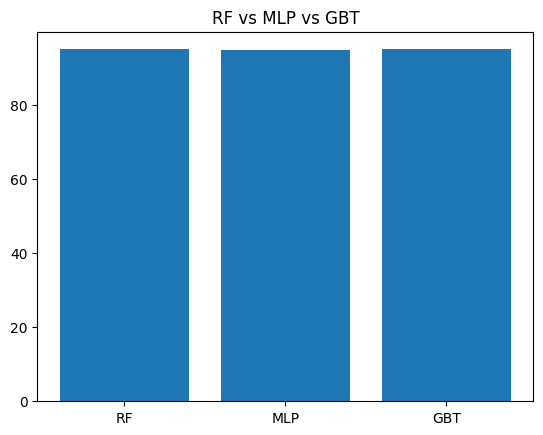

In [ ]:
print()
print("------------------------------------------------------------")
print()


import matplotlib.pyplot as plt
vals=[acc_rf,acc_mlp,acc_gb]
inds=range(len(vals))
labels=["RF","MLP","GBT"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title('RF vs MLP vs GBT')
plt.show()